In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [72]:
%run ../cow.py
%run ../optimize_pkg.py

In [7]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.1)
tx_SNR_range = arange(5, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
start_node, end_node = 2, 36
user_range = arange(start_node, end_node, 1)

In [4]:
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"
extension = ".in"

# Optimize 1

In [90]:
%%time
rx_SNR_range = arange(0, 12, 0.1)
optimize_1_data = zeros((len(user_range), 5))
tx_SNR_range = arange(12, 50, 0.1)
for N in user_range:
    optimize_1_data[N-start_node] = optimize_1(N, rx_SNR_range, tx_SNR_range, filepath_down, filepath_up, protocolbit)

CPU times: user 41.7 s, sys: 659 ms, total: 42.3 s
Wall time: 42 s


# Optimize 2

In [25]:
%%time
optimize_2_data = zeros((len(user_range), 5))
rx_SNR_start = -1
d_actual_SNR = 0.1
for N in user_range:
    optimize_2_data[N-start_node] = optimize_2(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, d_actual_SNR)
    print N, optimize_2_data[N-start_node, 1]

2 47.29
3 33.64
4 26.77
5 22.75
6 20.05
7 18.09
8 16.8
9 15.7
10 14.97
11 14.33
12 13.88
13 13.38
14 13.01
15 13.01
16 12.51
17 12.43
18 12.43
19 12.54
20 12.19
21 12.46
22 12.18
23 12.65
24 12.42
25 13.2
26 12.99
27 12.79
28 14.08
29 13.91
30 13.75
31 16.29
32 16.15
33 16.03
34 15.91
35 15.78
CPU times: user 4h 8min, sys: 1min 58s, total: 4h 9min 59s
Wall time: 10h 46min 39s


[ -0.1   0.3   0.6   1.    1.2   1.5   1.9   2.1   2.4   2.7   3.    3.1
   3.3   3.8   3.8   4.1   4.5   4.9   4.9   5.4   5.4   6.1   6.1   7.1
   7.    7.    8.5   8.5   8.5  11.1  11.1  11.1  11.1  11.1]
[ 47.29  33.64  26.77  22.75  20.05  18.09  16.8   15.7   14.97  14.33
  13.88  13.38  13.01  13.01  12.51  12.43  12.43  12.54  12.19  12.46
  12.18  12.65  12.42  13.2   12.99  12.79  14.08  13.91  13.75  16.29
  16.15  16.03  15.91  15.78]


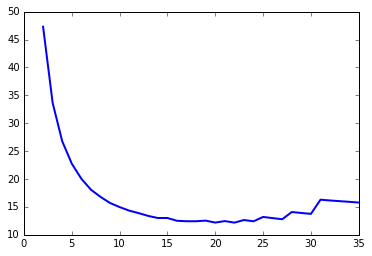

In [27]:
print optimize_2_data[:,0]
print optimize_2_data[:,1]
plot(user_range, optimize_2_data[:,1], lw=2.0)
# rx_SNR_start = {N: optimize_2_data[N-start_node, 0] - d_actual_SNR for N in user_range}
# print rx_SNR_start

In [ ]:
optimize_2_old = [[ -1.00000000e-01,   4.72900000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  3.00000000e-01,   3.36400000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  6.00000000e-01,   2.67500000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  1.00000000e+00,   2.27400000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  1.20000000e+00,   1.99300000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  1.50000000e+00,   1.80500000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  1.80000000e+00,   1.66800000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  2.00000000e+00,   1.55600000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  2.30000000e+00,   1.47800000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  2.60000000e+00,   1.41800000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  2.80000000e+00,   1.36200000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  3.00000000e+00,   1.31700000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  3.10000000e+00,   1.26900000e+01,   1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  3.60000000e+00  , 1.26900000e+01 ,  1.33333333e+04,   1.33333333e+04,
    1.33333333e+04],
 [  3.60000000e+00 ,  1.22400000e+01,   1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  3.90000000e+00,   1.21400000e+01 ,  1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  4.20000000e+00 ,  1.20700000e+01,   1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  4.60000000e+00  , 1.21400000e+01,   1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  4.60000000e+00 ,  1.18400000e+01 ,  1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  5.10000000e+00 ,  1.20600000e+01,   1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04],
 [  5.00000000e+00 ,  1.17000000e+01 ,  1.33333333e+04 ,  1.33333333e+04,
    1.33333333e+04]
 [  5.70000000e+00   1.21700000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  5.70000000e+00   1.19400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  6.60000000e+00   1.26400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  6.60000000e+00   1.24400000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  6.60000000e+00   1.22600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  8.00000000e+00   1.34900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  8.00000000e+00   1.33300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  8.00000000e+00   1.31700000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.06000000e+01   1.56300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.06000000e+01   1.54900000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.06000000e+01   1.53600000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.06000000e+01   1.52300000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]
 [  1.05000000e+01   1.50100000e+01   1.33333333e+04   1.33333333e+04
    1.33333333e+04]]

# Optimize 3

In [89]:
%%time
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

optimize_3_data = zeros((34, 5))
rx_SNR_start = -1
d_actual_SNR = 0.1
tx_SNR_range = arange(12, 50, 0.1)
for N in user_range:
    optimize_3_data[N-user_range[0]] = optimize_3(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, protocolbit, d_actual_SNR)
    print N, optimize_3_data[N-user_range[0]]
    
# print optimize_3_data

2 [ -3.00000000e-01   4.72000000e+01   6.67958910e-14   6.79188390e-08
   6.79188390e-08]
3 [  1.00000000e-01   3.36000000e+01   1.36468457e-21   2.37410048e-08
   2.37410048e-08]
4 [  5.00000000e-01   2.68000000e+01   8.19193314e-31   6.70889758e-09
   6.70889758e-09]
5 [  9.00000000e-01   2.27000000e+01   6.82032706e-42   1.08739191e-09
   1.08739191e-09]
6 [  1.20000000e+00   2.01000000e+01   6.48952904e-51   9.32053455e-10
   9.32053455e-10]
7 [  1.50000000e+00   1.81000000e+01   4.40432136e-60   2.30473535e-10
   2.30473535e-10]
8 [  1.90000000e+00   1.68000000e+01   2.71518255e-75   9.01178423e-11
   9.01178423e-11]
9 [  2.10000000e+00   1.57000000e+01   3.25699565e-81   1.13997602e-10
   1.13997602e-10]
10 [  2.40000000e+00   1.50000000e+01   3.54063495e-92   1.63213992e-10
   1.63213992e-10]
11 [  2.60000000e+00   1.44000000e+01   3.17321968e-97   2.80194782e-10
   2.80194782e-10]
12 [  3.00000000e+000   1.39000000e+001   2.98180582e-116   6.84675633e-011
   6.84675633e-011]
13

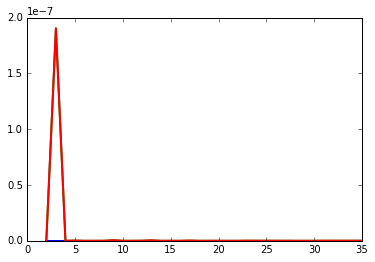

In [32]:
plot(user_range, optimize_3_data[:,2], lw=2.0)
plot(user_range, optimize_3_data[:,3], lw=2.0)
plot(user_range, optimize_3_data[:,4], lw=2.0)

In [33]:
print optimize_3_data[:,2]
print optimize_3_data[:,3]

[  3.46504057e-021   6.25178513e-019   2.13663220e-050   5.11849896e-046
   1.06512976e-093   3.34237860e-087   6.84895214e-081   1.24872137e-075
   2.73429275e-132   1.43466523e-123   2.98180582e-116   6.69315868e-108
   3.28870905e-170   2.67324309e-160   6.14117552e-149   8.45459957e-138
   9.91138439e-203   1.43880848e-187   1.18096328e-172   0.00000000e+000
   7.58724540e-218   3.45314375e-198   1.40355787e-181   7.56629988e-233
   2.85344803e-207   1.20006837e-185   0.00000000e+000   7.03993409e-259
   4.74548467e-222   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   0.00000000e+000]
[  1.31067068e-11   1.90343646e-07   7.74306133e-14   1.59367810e-10
   6.80487300e-17   2.28382042e-14   1.79269191e-11   4.88241156e-10
   1.69747638e-14   1.09438634e-12   6.84675633e-11   3.70914022e-10
   1.20471352e-14   9.69888057e-12   4.90068630e-12   1.61925300e-10
   1.52141220e-13   1.87370607e-11   1.07202646e-11   1.50780921e-13
   1.16547145e-13   7.78628713e-1

# Optimize 5

In [34]:
optimize_filepath_down = "../data_tables/optimize_down/n"
optimize_filepath_up = "../data_tables/optimize_up/n"
# tx_SNR_range = arange(5, 50, 0.01)

In [37]:
%%time
for N in user_range[::-1]:
    print "=== N {0} ===".format(N)
    tx_SNR_range = arange(5, 50, 1)
    for linktarget in [10**i for i in range(-10, 0)]:
        z = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)
        print linktarget, " : ", z[1]

=== N 35 ===
1e-10  :  16
1e-09  :  16
1e-08  :  15
1e-07  :  15
1e-06  :  14
1e-05  :  13
0.0001  :  13
0.001  :  12
0.01  :  11
0.1  :  11
=== N 34 ===
1e-10  :  16
1e-09  :  16
1e-08  :  15
1e-07  :  15
1e-06  :  14
1e-05  :  14
0.0001  :  13
0.001  :  12
0.01  :  11
0.1  :  11
=== N 33 ===
1e-10  :  14
1e-09  :  13
1e-08  :  13
1e-07  :  12
1e-06  :  12
1e-05  :  11
0.0001  :  11
0.001  :  10
0.01  :  10
0.1  :  11
=== N 32 ===
1e-10  :  14
1e-09  :  13
1e-08  :  13
1e-07  :  12
1e-06  :  12
1e-05  :  11
0.0001  :  11
0.001  :  10
0.01  :  10
0.1  :  11
=== N 31 ===
1e-10  :  14
1e-09  :  14
1e-08  :  13
1e-07  :  13
1e-06  :  12
1e-05  :  12
0.0001  :  11
0.001  :  10
0.01  :  10
0.1  :  11
=== N 30 ===
1e-10  :  13
1e-09  :  12
1e-08  :  12
1e-07  :  12
1e-06  :  11
1e-05  :  11
0.0001  :  10
0.001  :  10
0.01  :  10
0.1  :  11
=== N 29 ===
1e-10  :  13
1e-09  :  12
1e-08  :  12
1e-07  :  12
1e-06  :  11
1e-05  :  11
0.0001  :  10
0.001  :  10
0.01  :  9
0.1  :  11
=== N 28 ===
1

In [38]:
linktargetdct = {
    35 : [-2, -1],
    34 : [-2, -1],
    33 : [-3, -2, -1],
    32 : [-3, -2],
    31 : [-3, -2],
    30 : [-4, -3, -2],
    29 : [-2],
    28 : [-2],
    27 : [-3],
    26 : range(-6, -1),
    25 : range(-6, -1),
    24 : range(-7, -1),
    23 : range(-7, -1),
    22 : range(-8, -1),
    21 : range(-7, -1),
    20 : range(-7, -1),
    19 : range(-5, -1),
    18 : range(-3, -1),
    17 : range(-10, -1),
    16 : range(-9, -1),
    15 : range(-6, -1),
    14 : range(-10, -1),
    13 : range(-9, -1),
    12 : [-3],
    11 : range(-8, -2),
    10 : range(-10, -1),
    9 : range(-10, -2),
    8 : range(-10, -2),
    7 : [-4],
    6 : [-4],
    5 : range(-8, -3),
    4 : range(-10, -3),
    3 : range(-10, -3),
    2 : range(-10, -6)
}

tx_start_dct = {
    35 : 10,
    34 : 10,
    33 : 9,
    32 : 9,
    31 : 9,
    30 : 9,
    29 : 8,
    28 : 8,
    27 : 8,
    26 : 9,
    25 : 9,
    24 : 9,
    23 : 9,
    22 : 9,
    21 : 9,
    20 : 9,
    19 : 9,
    18 : 9,
    17 : 10,
    16 : 10,
    15 : 10,
    14 : 11,
    13 : 11,
    12 : 11,
    11 : 12,
    10 : 13,
    9 : 14,
    8 : 15,
    7 : 16,
    6 : 18,
    5 : 21,
    4 : 26,
    3 : 33,
    2 : 46
}

In [40]:
%%time
for N in user_range[::-1]:
    print "=== N {0} ===".format(N)
    tx_SNR_range = arange(tx_start_dct[N], 50, 0.1)
    for linktarget in [10**i for i in linktargetdct[N]]:
        z = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)
        print linktarget, " : ", z[1]

=== N 35 ===
0.01  :  10.3
0.1  :  10.7
=== N 34 ===
0.01  :  10.4
0.1  :  10.5
=== N 33 ===
0.001  :  9.6
0.01  :  9.2
0.1  :  10.5
=== N 32 ===
0.001  :  9.7
0.01  :  9.1
=== N 31 ===
0.001  :  9.9
0.01  :  9.2
=== N 30 ===
0.0001  :  9.7
0.001  :  9.1
0.01  :  9.1
=== N 29 ===
0.01  :  9.0
=== N 28 ===
0.01  :  9.0
=== N 27 ===
0.001  :  9.0
=== N 26 ===
1e-06  :  10.0
1e-05  :  9.6
0.0001  :  9.2
0.001  :  9.2
0.01  :  9.2
=== N 25 ===
1e-06  :  9.8
1e-05  :  9.4
0.0001  :  9.4
0.001  :  9.2
0.01  :  9.3
=== N 24 ===
1e-07  :  9.9
1e-06  :  9.6
1e-05  :  9.4
0.0001  :  9.2
0.001  :  9.1
0.01  :  9.2
=== N 23 ===
1e-07  :  9.8
1e-06  :  9.7
1e-05  :  9.5
0.0001  :  9.4
0.001  :  9.3
0.01  :  9.3
=== N 22 ===
1e-08  :  10.0
1e-07  :  9.9
1e-06  :  9.7
1e-05  :  9.6
0.0001  :  9.4
0.001  :  9.3
0.01  :  9.4
=== N 21 ===
1e-07  :  9.9
1e-06  :  9.8
1e-05  :  9.7
0.0001  :  9.6
0.001  :  9.5
0.01  :  9.5
=== N 20 ===
1e-07  :  10.0
1e-06  :  9.9
1e-05  :  9.8
0.0001  :  9.7
0.001  :  9.

In [51]:
linktargetdct = {
    35 : [-2],
    34 : [-2],
    33 : [-2],
    32 : [-2],
    31 : [-2],
    30 : [-2],
    29 : [-2],
    28 : [-2],
    27 : [-3],
    26 : [-2],
    25 : [-3],
    24 : [-3],
    23 : [-2],
    22 : [-3],
    21 : [-2],
    20 : [-3],
    19 : [-3],
    18 : [-3],
    17 : [-3],
    16 : [-3],
    15 : [-3],
    14 : [-3],
    13 : [-3],
    12 : [-3],
    11 : [-3],
    10 : [-3],
    9 : [-4],
    8 : [-4],
    7 : [-4],
    6 : [-4],
    5 : [-4],
    4 : [-5],
    3 : [-5],
    2 : [-7]
}

tx_start_dct = {
    35 : 10.2,
    34 : 10.3,
    33 : 9.1,
    32 : 8.8,
    31 : 9.1,
    30 : 8.8,
    29 : 8.9,
    28 : 8.9,
    27 : 8.9,
    26 : 9.1,
    25 : 9.1,
    24 : 8.7,
    23 : 9,
    22 : 9.2,
    21 : 9.2,
    20 : 9.5,
    19 : 9.7,
    18 : 9.8,
    17 : 10.1,
    16 : 10.2,
    15 : 10.6,
    14 : 11,
    13 : 11.3,
    12 : 11.9,
    11 : 12.6,
    10 : 13.3,
    9 : 14.2,
    8 : 15.4,
    7 : 16.9,
    6 : 18.9,
    5 : 21.7,
    4 : 26,
    3 : 33,
    2 : 46.8
}

In [44]:
%%time
for N in user_range[::-1]:
    if len(linktargetdct[N]) > 1:
        print "=== N {0} ===".format(N)
        tx_SNR_range = arange(tx_start_dct[N], 50, 0.01)
        for linktarget in [10**i for i in linktargetdct[N]]:
            z = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)
            print linktarget, " : ", z[1]

=== N 30 ===
0.001  :  9.09
0.01  :  9.02
=== N 26 ===
0.0001  :  9.17
0.001  :  9.16
0.01  :  9.14
=== N 23 ===
0.001  :  9.29
0.01  :  9.27
=== N 21 ===
0.001  :  9.43
0.01  :  9.42
=== N 19 ===
0.0001  :  9.79
0.001  :  9.72
=== N 16 ===
0.0001  :  10.46
0.001  :  10.41
=== N 13 ===
0.0001  :  11.57
0.001  :  11.51
=== N 11 ===
0.0001  :  12.69
0.001  :  12.64
=== N 10 ===
0.0001  :  13.39
0.001  :  13.37
=== N 9 ===
0.0001  :  14.29
0.001  :  14.3
=== N 8 ===
0.0001  :  15.49
0.001  :  15.5
=== N 4 ===
1e-06  :  26.06
1e-05  :  26.06
0.0001  :  26.1
=== N 3 ===
1e-07  :  33.05
1e-06  :  33.04
1e-05  :  33.02
=== N 2 ===
1e-09  :  46.9
1e-08  :  46.89
1e-07  :  46.84
CPU times: user 2min 13s, sys: 4.37 s, total: 2min 18s
Wall time: 26min 56s


In [52]:
%%time
optimize_5_data = zeros((len(user_range), 8))
for N in user_range:
    tx_SNR_range = arange(tx_start_dct[N], 50, 0.01)
    for linktarget in [10**i for i in linktargetdct[N]]:
        optimize_5_data[N-user_range[0]] = optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)

CPU times: user 6min 32s, sys: 1.41 s, total: 6min 33s
Wall time: 6min 33s


In [62]:
N = 23
linktarget = 10**(-3)
tx_SNR_range = arange(9.2, 50, 0.01)
print optimize_4(N, tx_SNR_range, optimize_filepath_down, optimize_filepath_up, protocolbit, linktarget, linktarget)

(2.7999999999999989, 9.2899999999999974, 7505, 10416, 22079, array(0.000961700773175647), array(0.0008615026623526153), 2.8987923172962837e-12)


In [63]:
print optimize_5_data[19:26,1]

[ 9.36  9.28  9.24  9.09  9.2   9.1   9.  ]


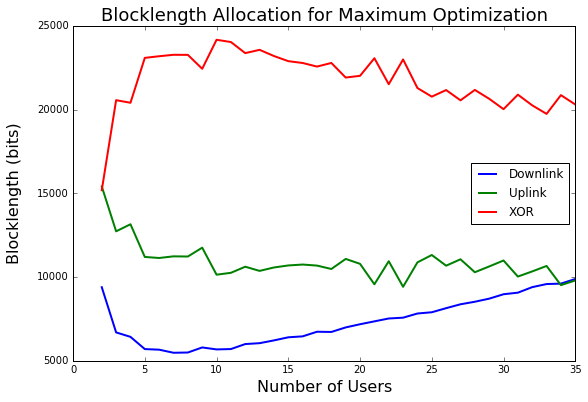

In [64]:
figure(figsize=(9, 6))
plot(user_range, optimize_5_data[:,2], lw=2.0, label='Downlink')
plot(user_range, optimize_5_data[:,3], lw=2.0, label='Uplink')
plot(user_range, optimize_5_data[:,4], lw=2.0, label='XOR')
legend(loc=0)
xlabel('Number of Users', fontsize=16)
ylabel('Blocklength (bits)', fontsize=16, labelpad=15)
title('Blocklength Allocation for Maximum Optimization', fontsize=18)
savefig('optimize_5_blocklength.pdf', bbox='tight')

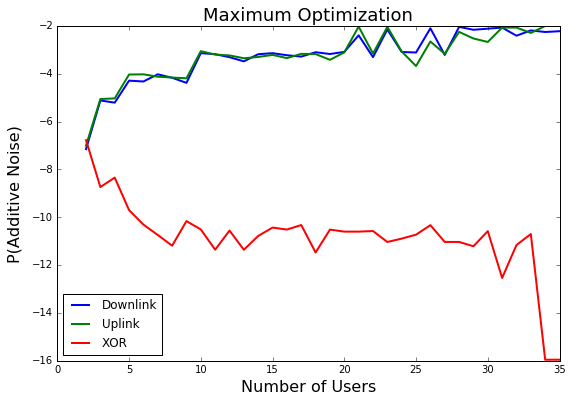

In [95]:
figure(figsize=(9, 6))
plot(user_range, log10(optimize_5_data[:,5]), lw=2.0, label='Downlink')
plot(user_range, log10(optimize_5_data[:,6]), lw=2.0, label='Uplink')
plot(user_range, log10(optimize_5_data[:,7]), lw=2.0, label='XOR')
legend(loc=0)
xlabel('Number of Users', fontsize=16)
ylabel('P(Additive Noise)', fontsize=16, labelpad=10)
title('Maximum Optimization', fontsize=18)
# savefig('optimize_5_padds_log10.pdf', bbox='tight')

In [68]:
print "=== Downlink ==="
print optimize_5_data[:,5]
print "=== Uplink ==="
print optimize_5_data[:,6]
print "=== XOR ==="
print optimize_5_data[:,7]

=== Downlink ===
[  7.11412151e-08   7.68916308e-06   6.23189817e-06   5.18028515e-05
   4.78483358e-05   9.54093891e-05   6.83560370e-05   4.19830712e-05
   7.29736963e-04   6.62766139e-04   4.96398409e-04   3.32355364e-04
   6.60317436e-04   7.30778882e-04   5.99997239e-04   5.25007544e-04
   7.99613010e-04   6.74232870e-04   8.27320384e-04   4.07857553e-03
   4.98202960e-04   7.16950647e-03   8.19395073e-04   7.78882177e-04
   8.00996513e-03   6.17099599e-04   9.19743106e-03   6.94634536e-03
   7.73635599e-03   8.58370857e-03   3.92948141e-03   6.53864427e-03
   5.60870676e-03   6.05725167e-03]
=== Uplink ===
[  9.94689983e-08   8.84018962e-06   9.38807173e-06   9.36125843e-05
   9.53177331e-05   7.57296735e-05   6.99947636e-05   6.47891311e-05
   8.86017752e-04   6.39065369e-04   5.88359482e-04   4.48814687e-04
   5.06489259e-04   6.18427725e-04   4.53963223e-04   6.85047344e-04
   6.69648840e-04   3.85026145e-04   7.85298760e-04   9.44045096e-03
   7.02031743e-04   9.18389634e-03 

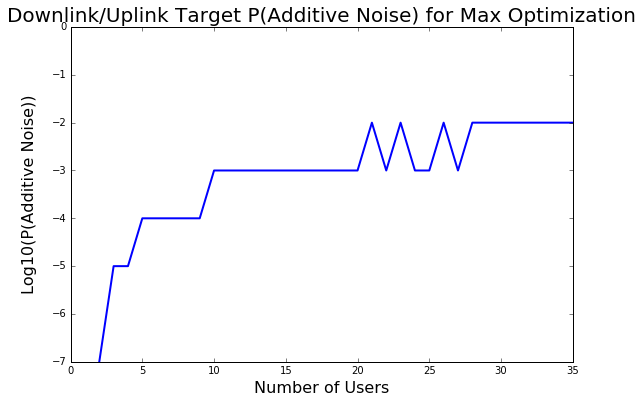

In [66]:
optimize_5_target = [linktargetdct[N][0] for N in user_range]
figure(figsize=(9, 6))
plot(user_range, optimize_5_target, lw=2.0)
ylim([-7, 0])
xlabel('Number of Users', fontsize=16)
ylabel('Log10(P(Additive Noise))', fontsize=16, labelpad=15)
title('Downlink/Uplink Target P(Additive Noise) for Max Optimization', fontsize=20)
savefig('optimize_5_target.pdf', bbox='tight')

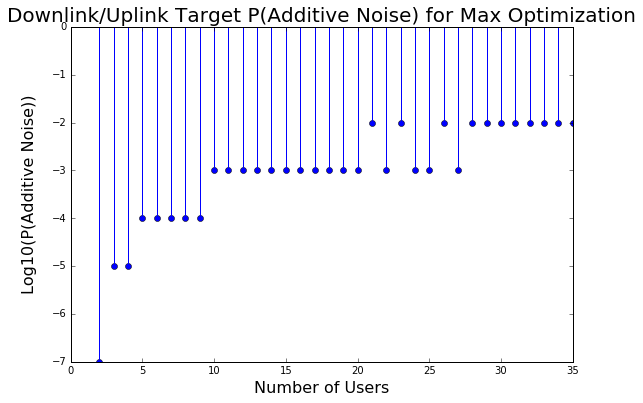

In [57]:
figure(figsize=(9, 6))
stem(user_range, optimize_5_target, lw=2.0)
ylim([-7, 0])
xlabel('Number of Users', fontsize=16)
ylabel('Log10(P(Additive Noise))', fontsize=16, labelpad=15)
title('Downlink/Uplink Target P(Additive Noise) for Max Optimization', fontsize=20)
# savefig('optimize_5_target.pdf', bbox='tight')

# Optimize 3 Ver 2

In [70]:
p_add1_dct = {N:optimize_5_data[N-start_node,5] for N in user_range}
p_add2_dct = {N:optimize_5_data[N-start_node,6] for N in user_range}
print p_add1_dct

{2: 7.1141215064721563e-08, 3: 7.6891630790322394e-06, 4: 6.2318981654676575e-06, 5: 5.1802851468868851e-05, 6: 4.7848335827412611e-05, 7: 9.5409389089829387e-05, 8: 6.8356037020013554e-05, 9: 4.1983071216256817e-05, 10: 0.00072973696292073504, 11: 0.00066276613940168851, 12: 0.00049639840935573041, 13: 0.00033235536350310706, 14: 0.00066031743603811902, 15: 0.00073077888160720224, 16: 0.00059999723866039202, 17: 0.00052500754377262466, 18: 0.00079961301005213611, 19: 0.00067423286967119289, 20: 0.0008273203840793331, 21: 0.0040785755325494473, 22: 0.00049820295968592599, 23: 0.0071695064701360212, 24: 0.00081939507337800701, 25: 0.00077888217707332231, 26: 0.0080099651277023183, 27: 0.00061709959910141135, 28: 0.0091974310595681133, 29: 0.0069463453615431952, 30: 0.0077363559868163971, 31: 0.0085837085728301989, 32: 0.0039294814144848669, 33: 0.0065386442664358037, 34: 0.0056087067567444334, 35: 0.0060572516658689568}


In [88]:
%%time
filepath_down = "../data_tables/hs_rs_downlink/n"
filepath_up = "../data_tables/hs_rs_uplink/n"

tx_SNR_range = arange(12, 50, 0.1)
optimize_3_data_2 = zeros((len(user_range), 5))
rx_SNR_start = -1
d_actual_SNR = 0.1
for N in user_range:
    optimize_3_data_2[N-user_range[0]] = optimize_3_2(N, rx_SNR_start, tx_SNR_range, filepath_down, filepath_up, p_add1_dct[N], p_add2_dct[N], protocolbit, d_actual_SNR)
    print N, optimize_3_data_2[N-user_range[0]]
    

2 [ -4.00000000e-01   4.72000000e+01   7.11412151e-08   9.94689983e-08
   7.52742846e-07]
3 [  1.00000000e-01   3.36000000e+01   7.68916308e-06   8.84018962e-06
   2.37410048e-08]
4 [  6.00000000e-01   2.68000000e+01   6.23189817e-06   9.38807173e-06
   8.80273060e-10]
5 [  9.00000000e-01   2.28000000e+01   5.18028515e-05   9.36125843e-05
   1.08739191e-09]
6 [  1.20000000e+00   2.01000000e+01   4.78483358e-05   9.53177331e-05
   9.32053455e-10]
7 [  1.50000000e+00   1.82000000e+01   9.54093891e-05   7.57296735e-05
   2.30473535e-10]
8 [  1.80000000e+00   1.69000000e+01   6.83560370e-05   6.99947636e-05
   4.26251922e-10]
9 [  2.00000000e+00   1.58000000e+01   4.19830712e-05   6.47891311e-05
   4.88241156e-10]
10 [  2.40000000e+00   1.51000000e+01   7.29736963e-04   8.86017752e-04
   1.63213992e-10]
11 [  2.70000000e+00   1.44000000e+01   6.62766139e-04   6.39065369e-04
   7.47000520e-11]
12 [  3.00000000e+00   1.39000000e+01   4.96398409e-04   5.88359482e-04
   6.84675633e-11]
13 [  3

[ 47.2  33.6  26.8  22.8  20.1  18.2  16.9  15.8  15.1  14.4  13.9  13.4
  13.1  13.1  12.6  12.5  12.5  12.6  12.3  12.6  12.2  12.9  12.5  13.3
  13.1  12.8  14.2  14.   13.9  16.5  16.3  16.1  16.1  15.9]


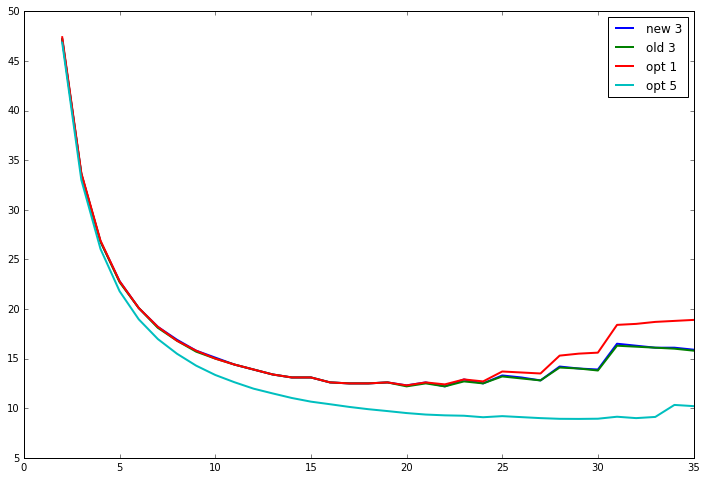

In [93]:
figure(figsize=(12,8))
plot(user_range, optimize_3_data_2[:,1], lw=2.0, label='new 3')
plot(user_range, optimize_3_data[:,1], lw=2.0, label='old 3')
plot(user_range, optimize_1_data[:,1], lw=2.0, label='opt 1')
plot(user_range, optimize_5_data[:,1], lw=2.0, label='opt 5')
legend(loc=0)
print optimize_3_data_2[:,1]

In [ ]:
# Compare with Shannon + Penalty

Populating the interactive namespace from numpy and matplotlib


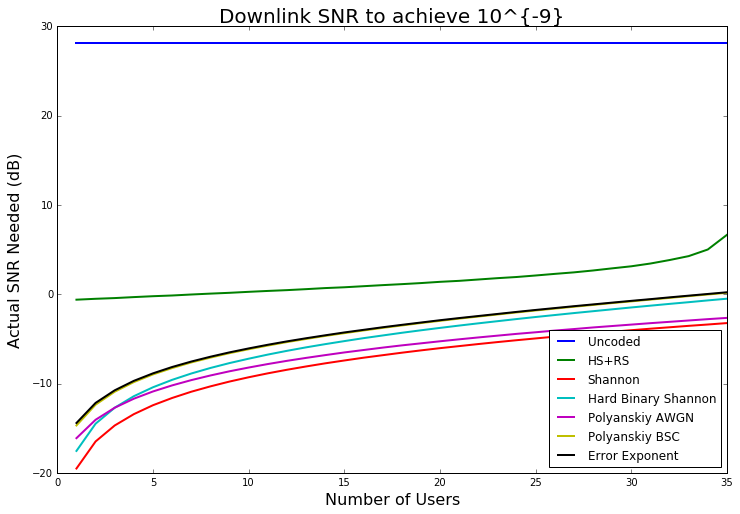

In [96]:
%pylab inline
# %matplotlib inline

threshold = 10**(-9)

shannonthresh_n = zeros(35)
hardshannonthresh_n = zeros(35)
polythresh_n = zeros(35)
bscthresh_n = zeros(35)
expthresh_n = zeros(35)
hsrsthresh_n = zeros(35)
uncoded_n = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh_n[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh_n[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh_n[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_down/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polythresh_n[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc_converse/down/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    bscthresh_n[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/down/n' + str(N) + '.in'
    exptable = load_table(expfile)
    expthresh_n[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded_n, lw=2.0, label='Uncoded')
plot(range(1,36), hsrsthresh_n, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh_n, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh_n, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), polythresh_n, lw=2.0, label='Polyanskiy AWGN')
plot(range(1,36), bscthresh_n, lw=2.0, label='Polyanskiy BSC')
plot(range(1,36), expthresh_n, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
# savefig('slice_waterfall_1.pdf', bbox='tight')